In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("steam.csv")

In [105]:
df.head(10)#memperlihatkan tabel

,Name,Price,Estimated owners,Peak CCU,Positive,Negative,User score,Metacritic score,Average playtime forever,Median playtime forever,Genres,Developers,Publishers,Windows,Mac,Linux,Free to Play,main_genre,Paid
20200,"Oct 21, 2008",0,0,0,6,11,0,0,0,0,"Casual,Indie,Sports",Perpetual FX Creative,Perpetual FX Creative,True,False,False,True,Casual,False
655370,"Oct 12, 2017",0,0,0,53,5,0,0,0,0,"Action,Indie",Rusty Moyher,Wild Rooster,True,True,False,True,Action,False
1732930,"Nov 17, 2021",0,0,0,0,0,0,0,0,0,"Action,Adventure,Indie,Strategy",Campião Games,Campião Games,True,False,False,True,Action,False
1355720,"Jul 23, 2020",0,0,0,3,0,0,0,0,0,"Adventure,Casual,Indie",Odd Critter Games,Odd Critter Games,True,True,True,True,Adventure,False
1139950,"Feb 3, 2020",0,0,0,50,8,0,0,0,0,"Adventure,Indie",Unusual Games,Unusual Games,True,True,False,True,Adventure,False
1469160,"Feb 26, 2021",0,68,0,87,49,0,0,0,0,"Adventure,Casual,Free to Play,Massively Multip...",7Road,7Road,True,False,False,True,Adventure,False
1659180,"Jan 9, 2022",0,3,0,21,7,0,0,0,0,"Indie,Strategy",MAKSIM VOLKAU,MAKSIM VOLKAU,True,False,False,True,Indie,False
1968760,"May 5, 2022",0,2,0,0,0,0,0,0,0,Casual,magnussoft,magnussoft,True,False,False,True,Casual,False
1178150,"Apr 2, 2020",0,1,0,76,6,0,0,0,0,"Adventure,RPG,Simulation,Strategy",Growing Seeds,"CFK Co., Ltd.",True,False,False,True,Adventure,False
320150,"Nov 11, 2014",0,0,0,225,45,0,0,703,782,"Action,Adventure,Indie",ONE MORE LEVEL,ONE MORE LEVEL,True,True,True,True,Action,False


In [104]:
df.info()#info kolom dll

<class 'pandas.core.frame.DataFrame'>
Index: 111452 entries, 20200 to 3183790
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Name                      111452 non-null  object
 1   Price                     111452 non-null  int64 
 2   Estimated owners          111452 non-null  int64 
 3   Peak CCU                  111452 non-null  int64 
 4   Positive                  111452 non-null  int64 
 5   Negative                  111452 non-null  int64 
 6   User score                111452 non-null  int64 
 7   Metacritic score          111452 non-null  int64 
 8   Average playtime forever  111452 non-null  int64 
 9   Median playtime forever   111452 non-null  int64 
 10  Genres                    105012 non-null  object
 11  Developers                104977 non-null  object
 12  Publishers                111452 non-null  object
 13  Windows                   111452 non-null  bool  
 14  Mac 

In [ ]:
df.describe()#statistik dasar

In [ ]:
len(df)#hitung banyak data

In [ ]:
df.shape#(rows, columns)

In [ ]:
df.isnull().sum()#hitung missing value per kolom

In [ ]:
df['Price'].mean()
df['Price'].median()
df['Price'].std()

In [ ]:
df['Publishers'].value_counts().head(10)#menunjukkan publisher mana yang paling banyak

In [ ]:
df['Genres'].value_counts().head(10)#menunjukkan genre paling banyak

In [ ]:
df['Categories'].value_counts().head(10)#menunjukkan genre paling banyak

In [ ]:
df[['Price', 'Average playtime forever']].corr()#menghitung korelasi antara price dengan Average playtime forever

In [ ]:
df[['Required age', 'Average playtime forever']].corr()

In [ ]:
df['Free to Play'] = df['Price'] == 0
df.groupby('Free to Play')['Average playtime forever'].mean()

In [ ]:
df.groupby('Genres')['Average playtime forever'].mean().sort_values(ascending=False).head(10)


In [ ]:
df.groupby('Publishers')['Average playtime forever'].mean().sort_values(ascending=False).head(10)

In [ ]:
df[df['Free to Play'] == True]['Genres'].value_counts().head(10)

In [ ]:
df.groupby('Genres')['Average playtime forever'].mean().sort_values(ascending=False).head(10)

In [ ]:
df[df['Free to Play'] == True]['Categories'].value_counts().head(10)

In [ ]:
df.isnull().sum()

# Contoh handling:
df['Publishers'] = df['Publishers'].fillna("Unknown")

# Untuk kolom numerik:
df['Price'] = df['Price'].fillna(df['Price'].median())

In [ ]:
df.dtypes

In [ ]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Average playtime forever'] = pd.to_numeric(df['Average playtime forever'], errors='coerce')

In [ ]:
df['playtime_category'] = pd.cut(
    df['Average playtime forever'],
    bins=[0, 5, 20, 100, 500, 10000],
    labels=["Very Short", "Short", "Medium", "Long", "Hardcore"]
)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


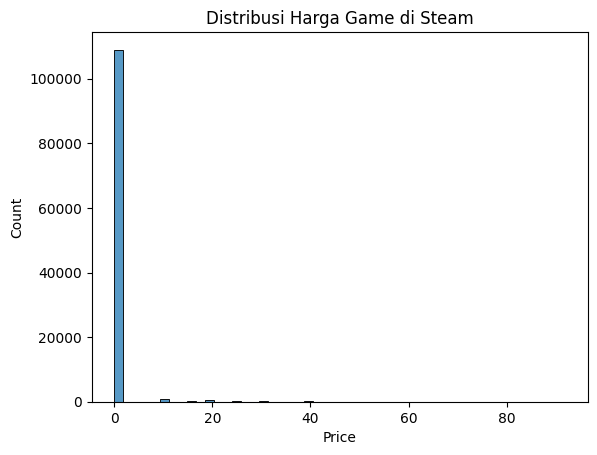

In [115]:
sns.histplot(df['Price'], bins=50)
plt.title("Distribusi Harga Game di Steam")
plt.show()

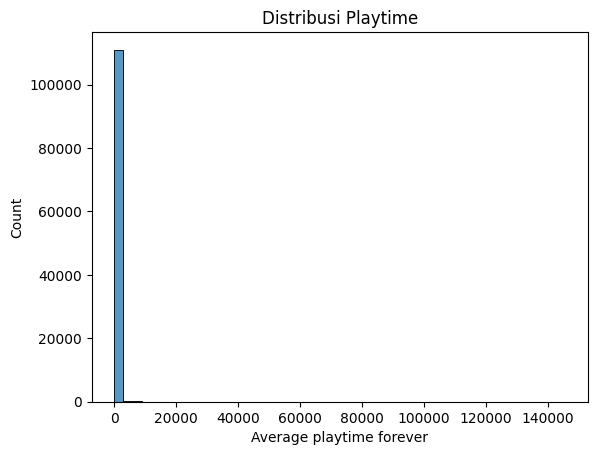

In [116]:
sns.histplot(df['Average playtime forever'], bins=50)
plt.title("Distribusi Playtime")
plt.show()

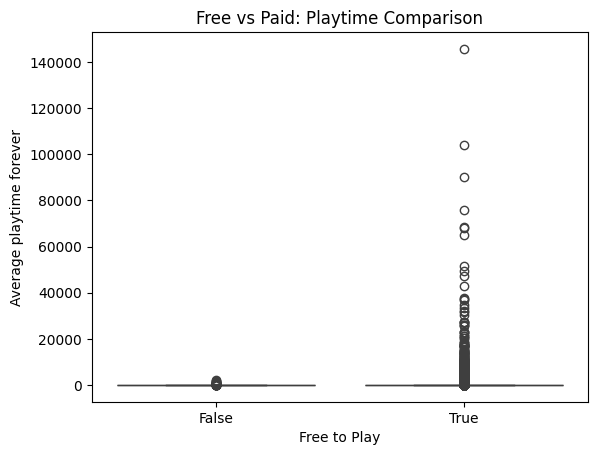

In [114]:
sns.boxplot(x=df['Free to Play'], y=df['Average playtime forever'])
plt.title("Free vs Paid: Playtime Comparison")
plt.show()

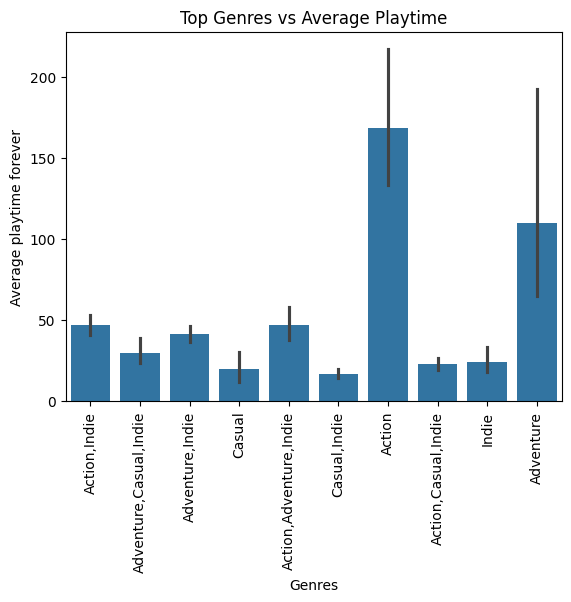

In [113]:
top_genres = df['Genres'].value_counts().head(10).index
sns.barplot(x=df[df['Genres'].isin(top_genres)]['Genres'], 
            y=df[df['Genres'].isin(top_genres)]['Average playtime forever'])
plt.xticks(rotation=90)
plt.title("Top Genres vs Average Playtime")
plt.show()


In [117]:
df.isnull().sum().sort_values(ascending=False)

Developers                  6475
Genres                      6440
main_genre                  6440
Estimated owners               0
Price                          0
Name                           0
Peak CCU                       0
User score                     0
Metacritic score               0
Negative                       0
Positive                       0
Median playtime forever        0
Average playtime forever       0
Windows                        0
Publishers                     0
Mac                            0
Linux                          0
Free to Play                   0
Paid                           0
dtype: int64

In [ ]:
cols = [
    'Name', 'Price', 'Estimated owners', 'Peak CCU',
    'Positive', 'Negative', 'User score', 'Metacritic score',
    'Average playtime forever', 'Median playtime forever',
    'Genres','Developers', 'Publishers', 'Windows', 'Mac', 'Linux','Free to Play'
]

df = df[cols]

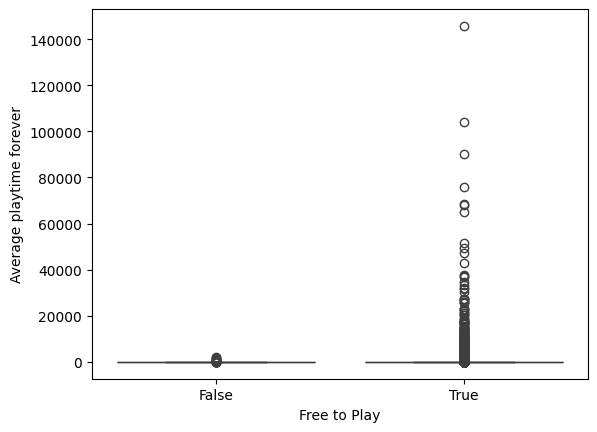

In [118]:
sns.boxplot(x=df['Free to Play'], y=df['Average playtime forever'])
plt.show()

In [112]:
df['Average playtime forever'].describe()

count    111452.000000
mean         81.247290
std         999.935906
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      145727.000000
Name: Average playtime forever, dtype: float64

In [119]:
threshold = df['Average playtime forever'].quantile(0.99)
threshold

np.float64(1443.9800000000105)

In [120]:
df_clean = df[df['Average playtime forever'] <= threshold]

In [121]:
num_cols = [
    'Price',
    'Estimated owners',
    'Peak CCU',
    'Positive',
    'Negative',
    'User score',
    'Metacritic score',
    'Average playtime forever'
]

corr = df[num_cols].corr()


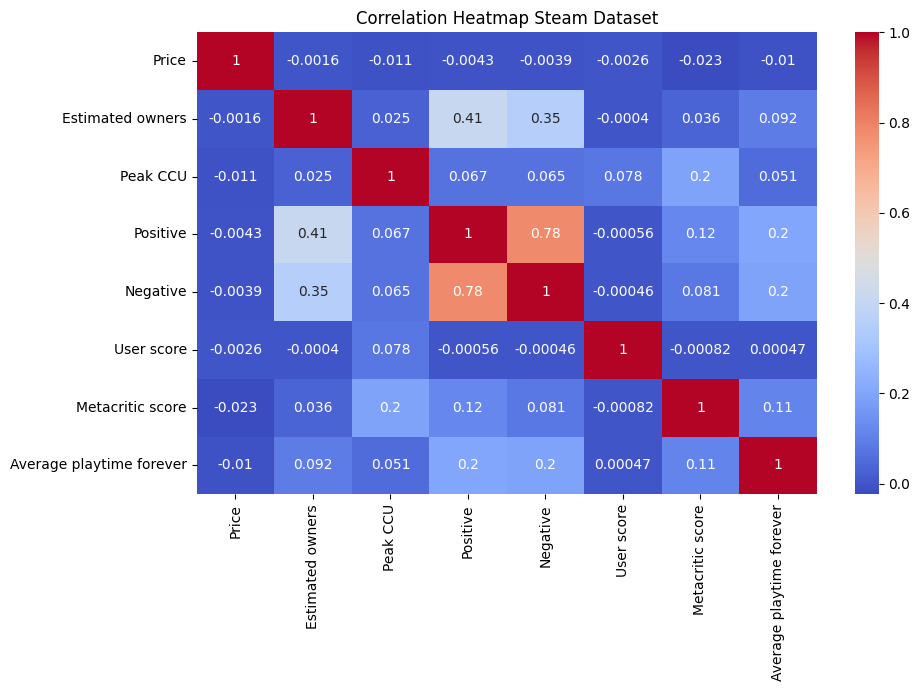

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Steam Dataset")
plt.show()

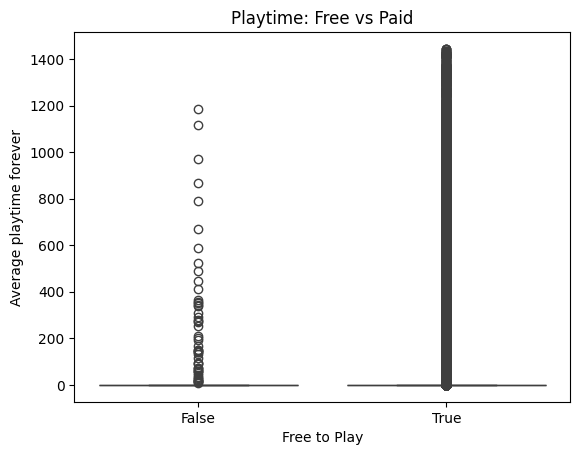

In [123]:
sns.boxplot(x='Free to Play', y='Average playtime forever', data=df_clean)
plt.title("Playtime: Free vs Paid")
plt.show()


In [111]:
df.groupby('Free to Play')['Average playtime forever'].describe()


,count,mean,std,min,25%,50%,75%,max
Free to Play,,,,,,,,
False,2491.0,7.849458,84.358326,0.0,0.0,0.0,0.0,2114.0
True,108961.0,82.925267,1011.158684,0.0,0.0,0.0,0.0,145727.0


In [ ]:
df['Paid'] = df['Price'] != 0
df.groupby('Paid')['Average playtime forever'].describe()

In [ ]:
df['main_genre'] = df['Genres'].str.split(',').str[0]


In [ ]:
df.groupby('main_genre')['Average playtime forever'].mean()\
  .sort_values(ascending=False).head(10)


In [ ]:
top_genres = df.groupby('main_genre')['Average playtime forever'].mean()\
               .sort_values(ascending=False).head(10)

top_genres.plot(kind='barh')
plt.title("Top Genres by Average Playtime")
plt.show()


In [ ]:
df['Estimated owners'].value_counts().head(10)

In [ ]:
df.groupby('Free to Play')['Estimated owners'].mean().sort_values(ascending=False).head(10)

Free to Play
True     179.370481
False    105.594139
Name: Estimated owners, dtype: float64

In [124]:
df.groupby('Free to Play')['Peak CCU'].mean().sort_values(ascending=False).head(10)

Free to Play
True     0.258414
False    0.070253
Name: Peak CCU, dtype: float64

In [125]:
df.groupby('Free to Play')['Estimated owners'].median().sort_values(ascending=False).head(10)

Free to Play
False    0.0
True     0.0
Name: Estimated owners, dtype: float64

In [126]:
df.groupby('Free to Play')['Peak CCU'].median().sort_values(ascending=False).head(10)

Free to Play
False    0.0
True     0.0
Name: Peak CCU, dtype: float64

In [128]:
df.groupby('Free to Play')['Estimated owners'].var().sort_values(ascending=False).head(10)

Free to Play
True     7.198004e+07
False    1.274939e+06
Name: Estimated owners, dtype: float64

In [129]:
df.groupby('Free to Play')['Peak CCU'].var().sort_values(ascending=False).head(10)

Free to Play
True     4.210691
False    1.187432
Name: Peak CCU, dtype: float64

In [136]:
df.groupby(['Genres', 'main_genre'])['Average playtime forever']\
  .var()\
  .sort_values(ascending=False)\
  .head(10)

Genres                                                                            main_genre           
Audio Production,Utilities                                                        Audio Production         8.509596e+08
Animation & Modeling,Design & Illustration,Education,Software Training,Utilities  Animation & Modeling     8.442981e+08
Adventure,Casual,Free to Play,RPG                                                 Adventure                5.100948e+08
Design & Illustration,Utilities                                                   Design & Illustration    3.247308e+08
Action,Free to Play,Indie,Massively Multiplayer,Simulation                        Action                   2.444421e+08
Education,Software Training,Utilities,Video Production                            Education                1.371471e+08
Action,Casual,Simulation,Sports,Strategy                                          Action                   1.147791e+08
Animation & Modeling,Design & Illustration,Utilities,Vid

In [139]:
df.groupby(['Free to Play', 'main_genre'])['Average playtime forever']\
  .var()\
  .sort_values(ascending=False)\
  .head(20)

Free to Play  main_genre           
True          Audio Production         1.438380e+08
              Design & Illustration    5.414491e+07
              Animation & Modeling     1.425087e+07
              Utilities                1.188954e+07
              Web Publishing           6.922084e+06
              Massively Multiplayer    5.430380e+06
              Simulation               3.563390e+06
              Education                2.191196e+06
              Adventure                1.164029e+06
              Free to Play             9.019605e+05
              Sports                   8.029642e+05
              Racing                   6.333123e+05
              RPG                      5.947861e+05
              Strategy                 4.982775e+05
              Action                   4.659319e+05
              Nudity                   4.293424e+05
              Casual                   4.143697e+05
              Indie                    3.604223e+05
              Software Train